In [515]:
#Loading the important libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [516]:
data=pd.read_csv(r"C:\Users\ASUS\Downloads\The_Cancer_data_1500_V2.csv")


In [517]:
# Basic view of the dataset
data.head()


,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [518]:
#Dtype and information about dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1500 non-null   int64  
 1   Gender            1500 non-null   int64  
 2   BMI               1500 non-null   float64
 3   Smoking           1500 non-null   int64  
 4   GeneticRisk       1500 non-null   int64  
 5   PhysicalActivity  1500 non-null   float64
 6   AlcoholIntake     1500 non-null   float64
 7   CancerHistory     1500 non-null   int64  
 8   Diagnosis         1500 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 105.6 KB


In [519]:
data['Gender'].value_counts()
# 764 male & 736 female

Gender
0    764
1    736
Name: count, dtype: int64

In [520]:
data.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


<Axes: ylabel='Density'>

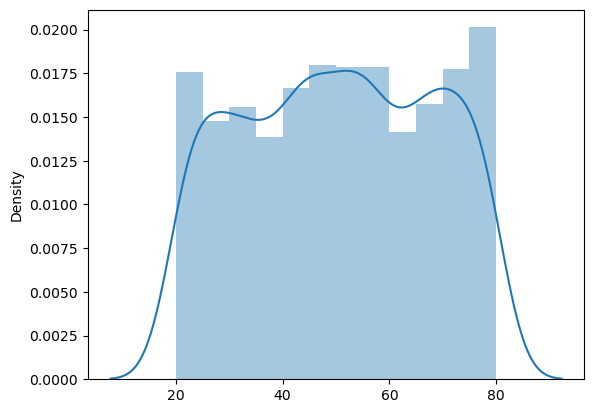

In [521]:
sns.distplot(x=data['Age'],kde=True)

In [522]:
grouped_data=data.groupby('Gender').mean()

In [523]:
grouped_data.transpose()

Gender,0,1
Age,50.196335,50.448370
BMI,27.602108,27.421156
Smoking,0.253927,0.285326
GeneticRisk,0.511780,0.505435
PhysicalActivity,4.832120,4.966242
AlcoholIntake,2.404447,2.432043
CancerHistory,0.141361,0.146739
Diagnosis,0.252618,0.494565


<Axes: ylabel='Gender'>

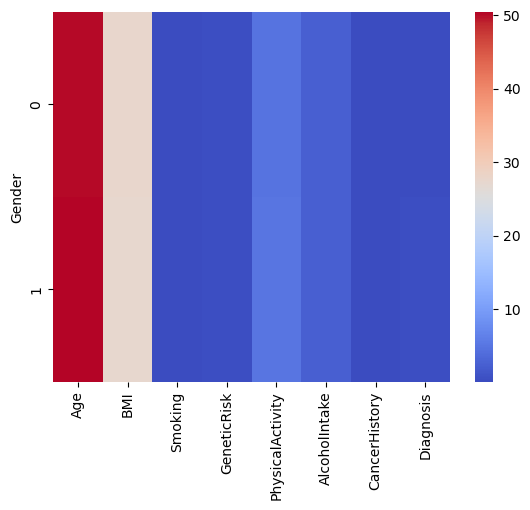

In [524]:
sns.heatmap(grouped_data,linecolor='white',cmap="coolwarm",)

In [525]:
# Features included for training the model ( AGE,GENDER,BMI,SMOKING,GENETIC RISK , PHYSICAL ACTIVITY , ALCOHOL INTAKE , CANCER HISTORY
X=data.drop(columns="Diagnosis",axis=1)

In [526]:
# TARGET VARIABLE
y=data['Diagnosis']

In [527]:
# STANDARDIZATION OF THE DATASET
from sklearn.preprocessing import StandardScaler

In [528]:
sd=StandardScaler()

In [529]:
X=sd.fit_transform(X)

In [530]:
# TRAIN_TEST_SPLIT INTO TRAIN AND TEST DATASET
from sklearn.model_selection import train_test_split


In [531]:
X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.33, random_state=42)

In [532]:
# USING RANDOMFOREST CLASSIFIER AS IT GAVE BEST RESULTS 
from sklearn.ensemble import RandomForestClassifier

In [533]:
rf=RandomForestClassifier()

In [534]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [535]:
predictions=rf.predict(X_test)

In [536]:
from sklearn.metrics import classification_report,accuracy_score

In [537]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94       322
           1       0.85      0.95      0.90       173

    accuracy                           0.93       495
   macro avg       0.91      0.93      0.92       495
weighted avg       0.93      0.93      0.93       495



In [538]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [539]:

rt_model=RandomForestClassifier()
knn_model=KNeighborsClassifier()
svm_model=SVC()
reg_model=LogisticRegression()
navie_model=GaussianNB()

In [540]:
model_list=[rt_model,knn_model,svm_model,reg_model,navie_model]

In [541]:
acc_list=[]
for model in model_list:
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    accu=accuracy_score(pred,y_test)
    acc_list.append(accu)

In [542]:
model_df=pd.DataFrame({"Model":model_list,"accuracy":acc_list})

In [543]:
model_df

,Model,accuracy
0,"(DecisionTreeClassifier(max_features='sqrt', r...",0.925253
1,KNeighborsClassifier(),0.894949
2,SVC(),0.890909
3,LogisticRegression(),0.854545
4,GaussianNB(),0.826263


In [544]:
# so the accuracy of these models show that random forest classifier has more accuracy so lets try with it

In [545]:
data['Gender'].replace([1,0],["F","M"],inplace=True)

<Axes: xlabel='Gender', ylabel='count'>

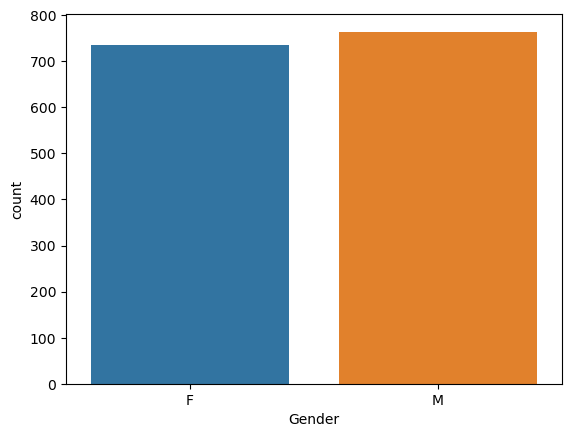

In [546]:
sns.countplot(x=data['Gender'])

In [547]:
data.columns

Index(['Age', 'Gender', 'BMI', 'Smoking', 'GeneticRisk', 'PhysicalActivity',
       'AlcoholIntake', 'CancerHistory', 'Diagnosis'],
      dtype='object')

In [548]:
# prediction Model 
age=int(input("enter the age"))
gender=str(input("enter the gender (0 --> M & 1--> F )"))
BMI=float(input("enter the BMI Value"))
Smoking=int(input(" smoking (0 if no & 1 if yes"))
GeneticRisk=float(input(" gentic risk (enter between 0-2)"))
PhysicalActivity=float(input("Physical Activity (enter between 0 - 9)"))
AlcoholIntake = float(input(" Alcohol Intake enter between 0 - 5 " ))
CancerHistory=int(input("cancer History (0 --> No & 1--> yes) "))

input_data=[age,gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory]
input_data_array=np.asarray(input_data)
input_data_reshaped=input_data_array.reshape(1,-1)
std_data=sd.transform(input_data_reshaped)
prediction=model.predict(std_data)
print(prediction)

if prediction[0] == 0 :
    print("No cancer is detected")
else:
    print("Cancer Dectected")

enter the age 50
enter the gender (0 --> M & 1--> F ) 0
enter the BMI Value 20
 smoking (0 if no & 1 if yes 1
 gentic risk (enter between 0-2) 0
Physical Activity (enter between 0 - 9) 2
 Alcohol Intake enter between 0 - 5  4
cancer History (0 --> No & 1--> yes)  0


[0]
No cancer is detected
